
<center>
<h1 style='font-family: Arial; color: #ff9900; text-align: center; text-shadow: 2px 2px 4px #000000;'><b>Which Debts Are Worth the Bank's Effort?</h1>
</center>

**Importing necessary libraries and Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
import statsmodels.api as sm


In [2]:
data = pd.read_csv('bank_data.csv')

In [3]:
data.head(10)

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male
5,731,548,520.710,Level 0 Recovery,35,Male
6,221,549,221.585,Level 0 Recovery,33,Male
7,1932,560,373.720,Level 0 Recovery,19,Female
8,1828,562,201.865,Level 0 Recovery,22,Female
9,2001,565,504.885,Level 0 Recovery,27,Male


**Basic Information about the data**

In [4]:
print("Shape of the datset : " , data.shape)
print("Size of the datset : " , data.size)
print("Dimension of the datset : " , data.ndim)
print("Length of the datset : " , len(data))

Shape of the datset :  (1882, 6)
Size of the datset :  11292
Dimension of the datset :  2
Length of the datset :  1882


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


**Statistics about the dataset**

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1882.0,1035.596174,591.458429,6.000,534.2500,1029.500000,1551.750000,2056.00000
expected_recovery_amount,1882.0,2759.967588,2019.826565,194.000,1261.2500,2062.000000,3569.500000,9964.00000
actual_recovery_amount,1882.0,4000.967837,4576.506350,200.425,1045.1903,2115.446373,5417.237207,34398.47971
age,1882.0,39.650372,15.453072,18.000,28.0000,35.000000,50.000000,84.00000


**Checking for NULL values**

In [7]:
data.isna().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

### Exploratory Data Analysis
**Univariate Analysis**

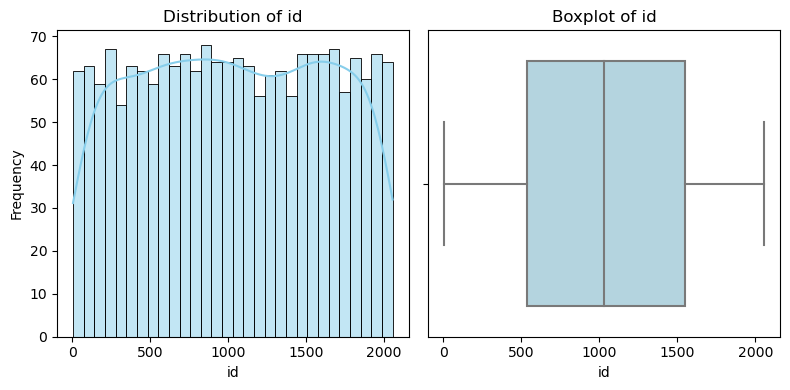

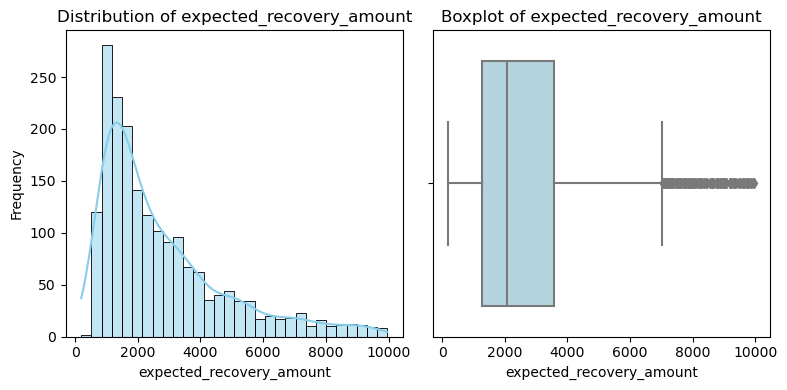

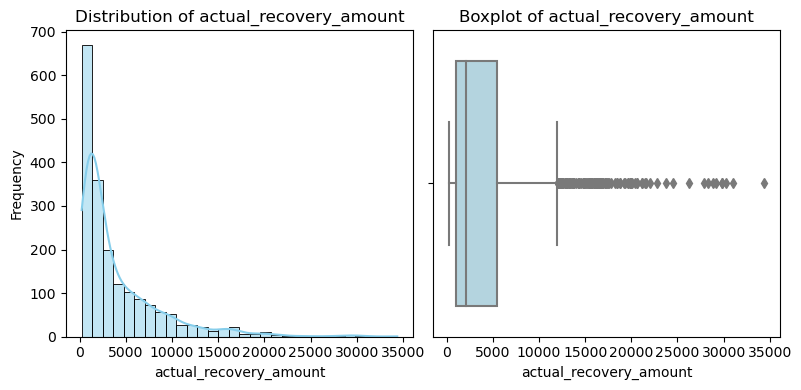

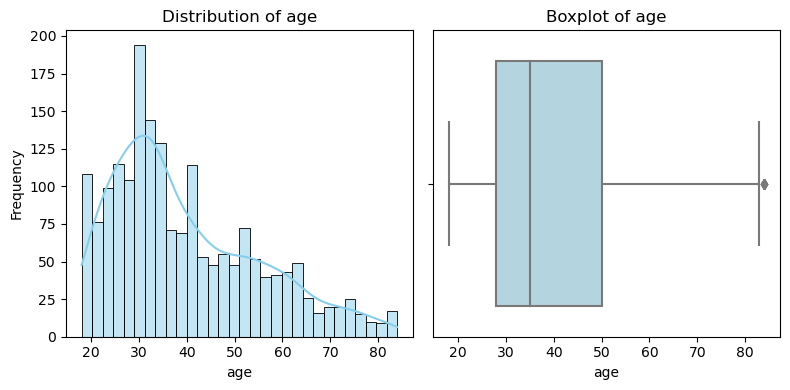

In [8]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


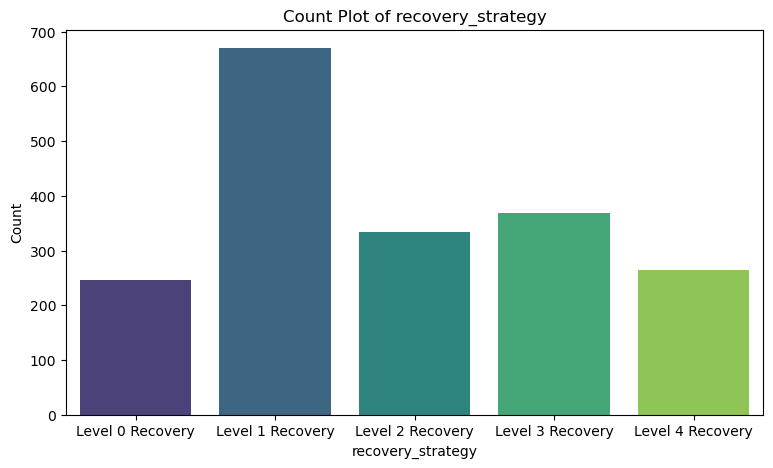

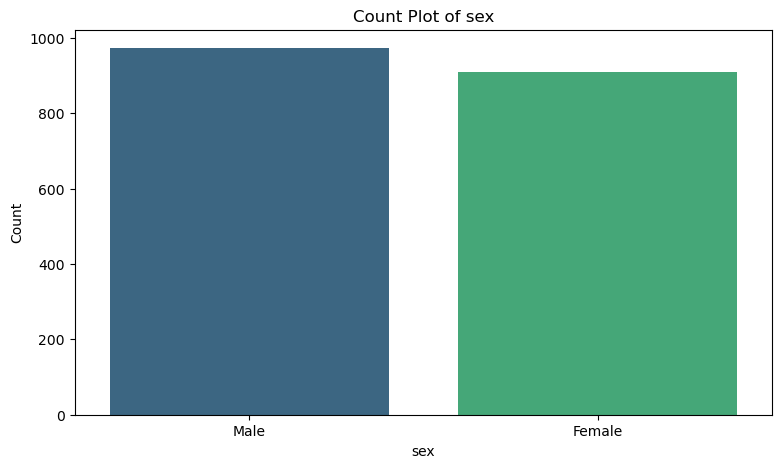

In [9]:

categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(9, 5))
    
    # Count plot
    sns.countplot(x=data[col], palette='viridis')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    plt.show()


**Bivariate Analysis**

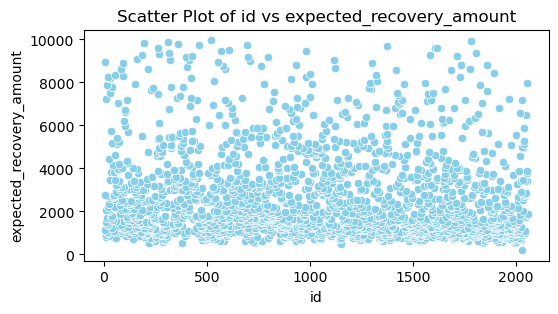

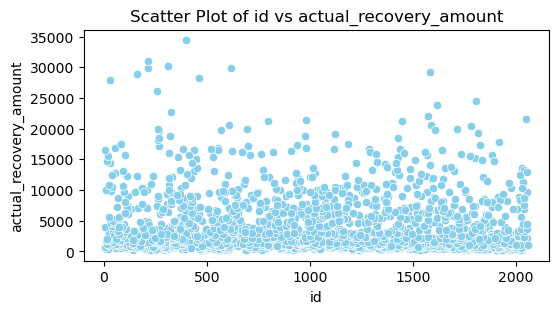

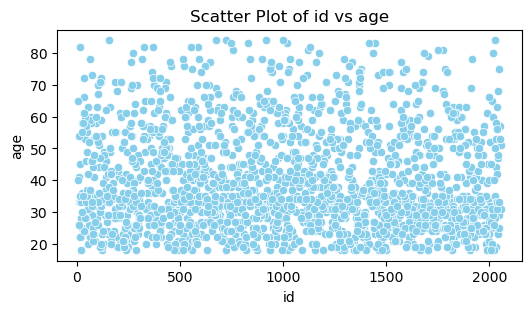

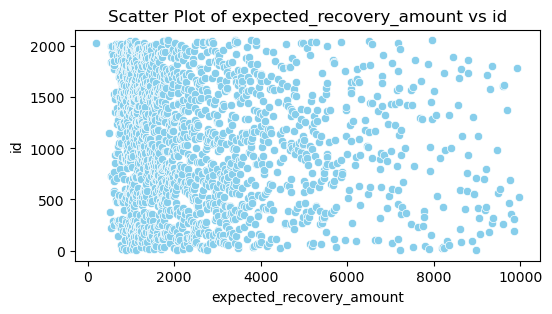

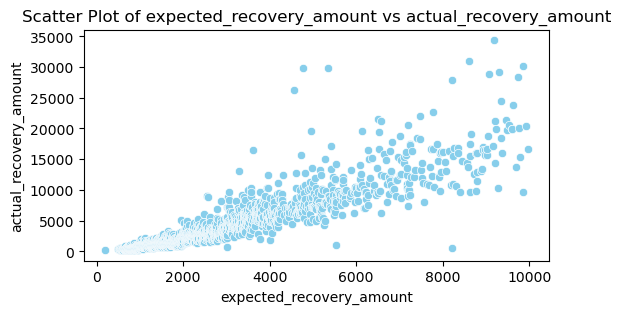

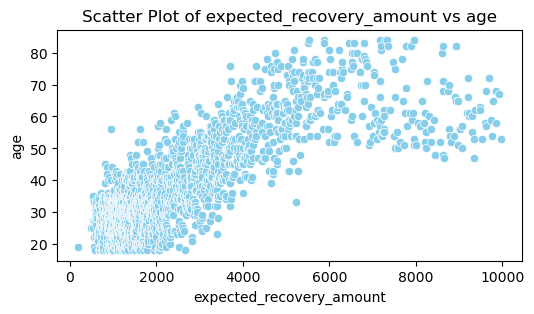

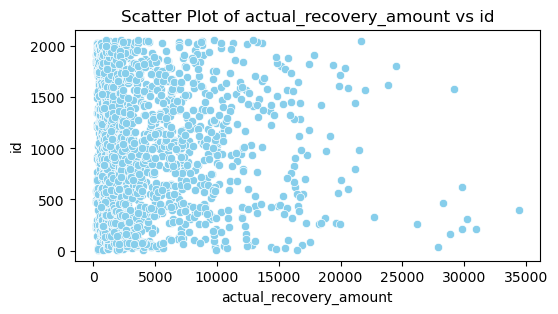

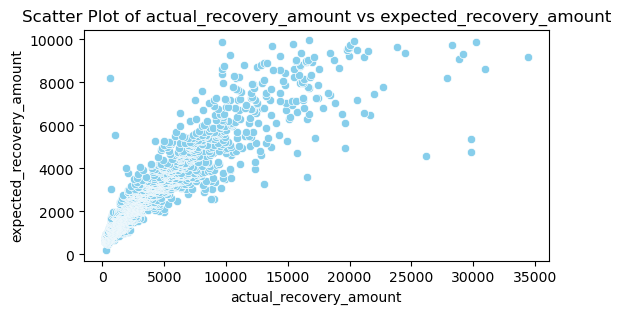

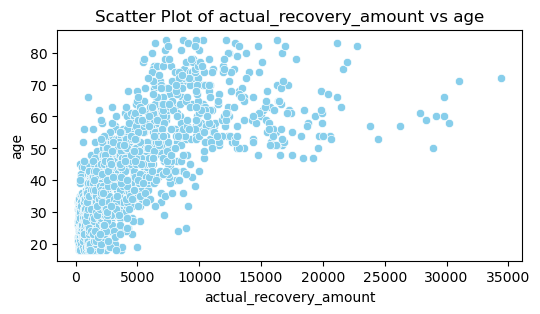

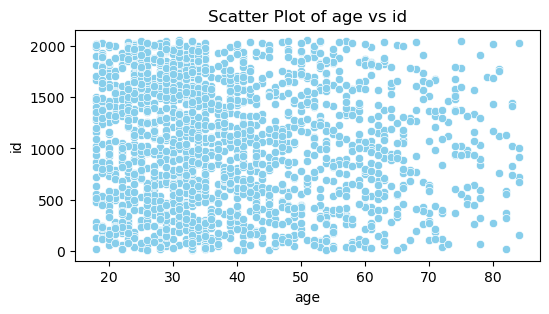

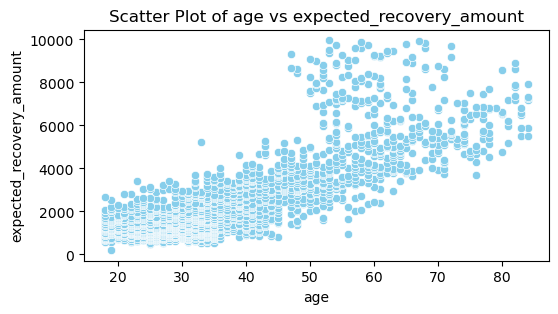

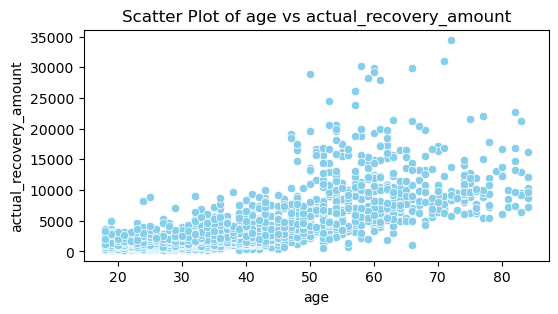

In [10]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            plt.figure(figsize=(6, 3))
            
            # Scatter plot
            sns.scatterplot(x=data[col1], y=data[col2], color='skyblue')
            plt.title(f'Scatter Plot of {col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            
            plt.show()

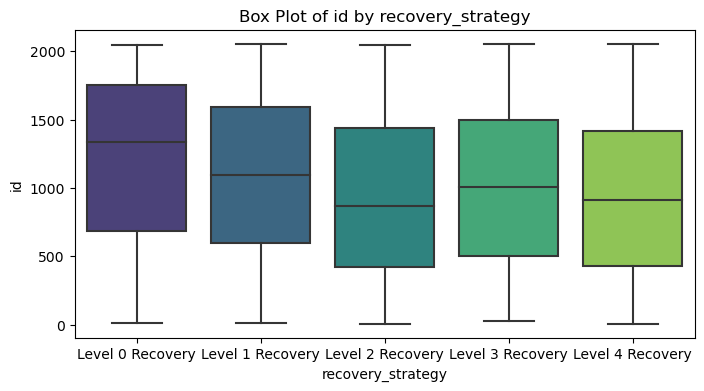

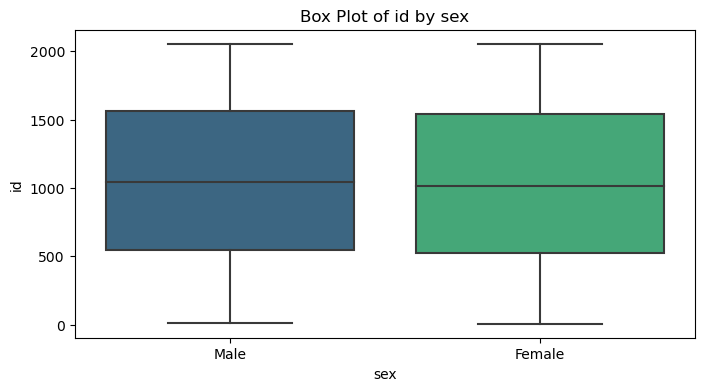

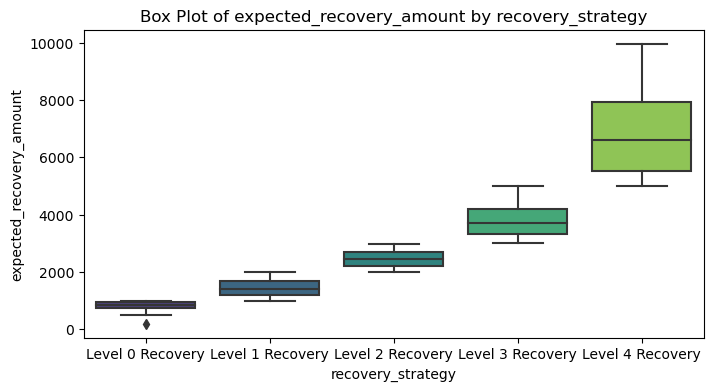

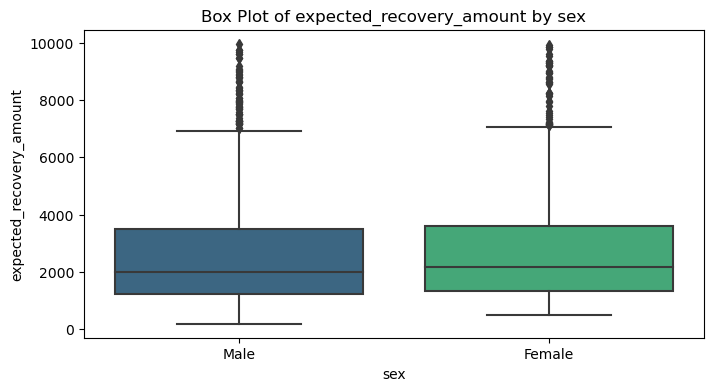

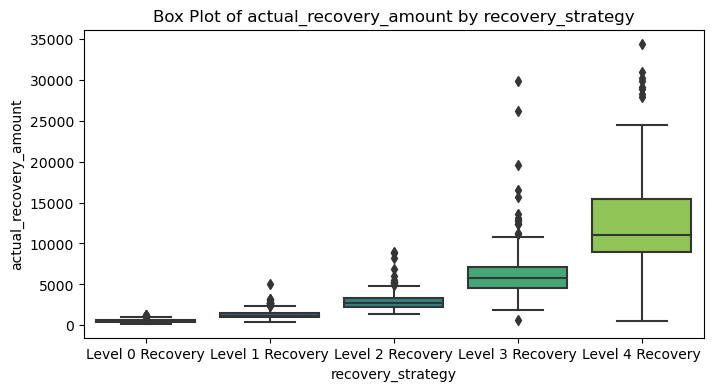

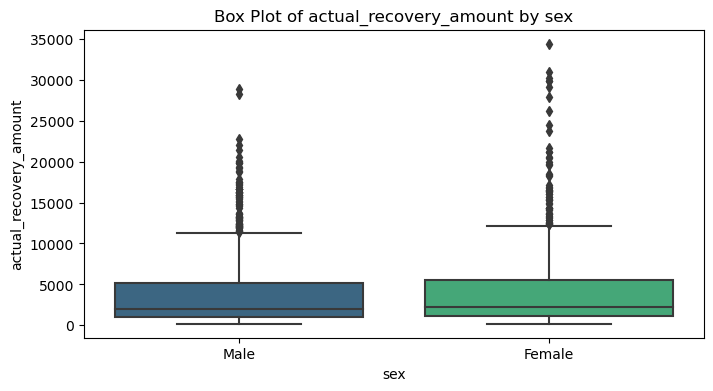

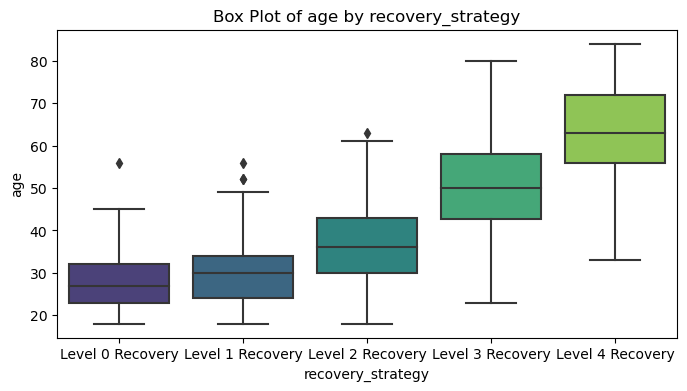

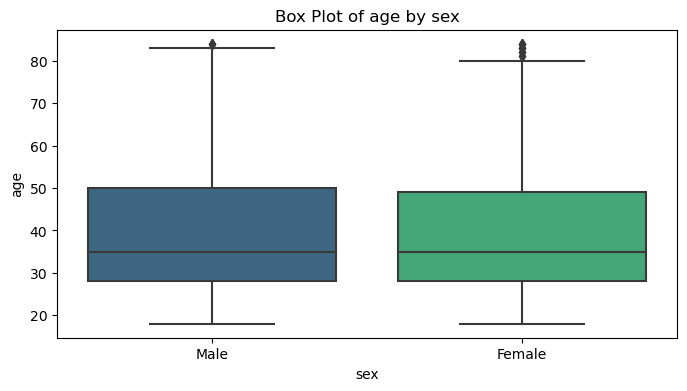

In [11]:
# Assuming 'data' is your DataFrame
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include='object').columns

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8, 4))
        
        # Box plot
        sns.boxplot(x=data[cat_col], y=data[num_col], palette='viridis')
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        
        plt.show()


### Graphical exploratory data analysis

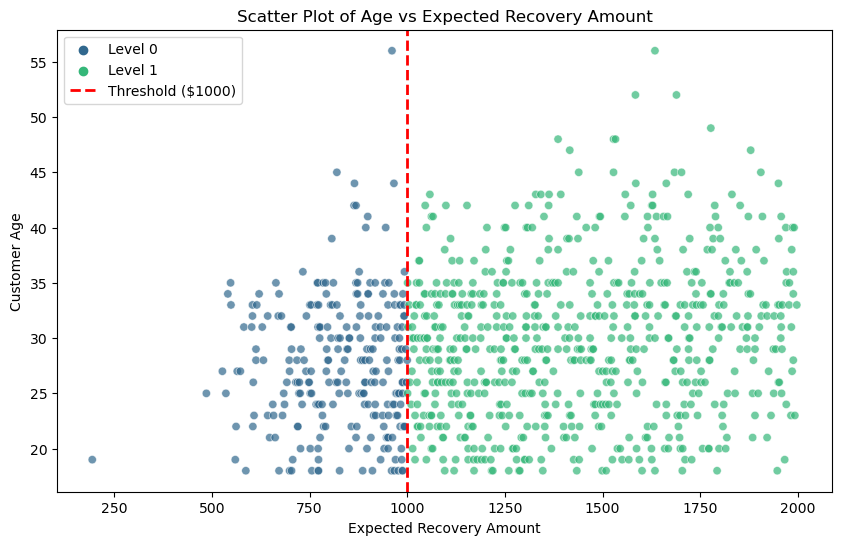

In [12]:
data['RecoveryLevel'] = pd.cut(data['expected_recovery_amount'], bins=[0, 1000, 2000], labels=['Level 0', 'Level 1'])

# Subset data for the desired range
subset_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]

# Create Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='age', data=subset_data, hue='RecoveryLevel', palette='viridis', alpha=0.7)
plt.axvline(x=1000, color='red', linestyle='--', linewidth=2, label='Threshold ($1000)')
plt.title('Scatter Plot of Age vs Expected Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Customer Age')
plt.legend()
plt.show()

### Statistical test: age vs. expected recovery amount


In [13]:
subset_data_above = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1100)]
subset_data_below = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1000)]

# Perform t-test for age
t_stat, p_value = ttest_ind(subset_data_above['age'], subset_data_below['age'], equal_var=False)

# Display results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The difference in average age is statistically significant.")
else:
    print("There is no significant difference in average age.")

T-statistic: 1.60851938268542
P-value: 0.10951368078691735
There is no significant difference in average age.


### Statistical test: sex vs. expected recovery amount

In [15]:
# Subset data for the specified range
subset_data_above = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1100)]
subset_data_below = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] < 1000)]

# Create contingency table
contingency_table = pd.crosstab(data['sex'], data['expected_recovery_amount'] <= 1000)

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("The difference in the percentage of male customers is statistically significant.")
else:
    print("There is no significant difference in the percentage of male customers.")


Chi-square statistic: 2.1768676619404688
P-value: 0.14009934427173568
There is no significant difference in the percentage of male customers.


### Exploratory graphical analysis: recovery amount


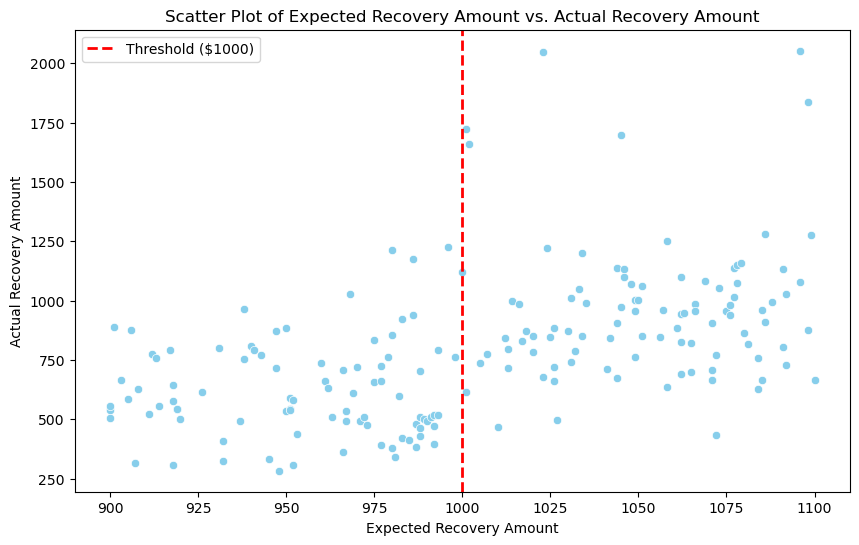

In [16]:
subset_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Create Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='expected_recovery_amount', y='actual_recovery_amount', data=subset_data, color='skyblue')
plt.axvline(x=1000, color='red', linestyle='--', linewidth=2, label='Threshold ($1000)')
plt.title('Scatter Plot of Expected Recovery Amount vs. Actual Recovery Amount')
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()
plt.show()

### Statistical analysis: recovery amount


In [17]:
subset_data_wide = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]
subset_data_narrow = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Perform Kruskal-Wallis test
statistic_wide, p_value_wide = kruskal(subset_data_wide['actual_recovery_amount'], data['expected_recovery_amount'])
statistic_narrow, p_value_narrow = kruskal(subset_data_narrow['actual_recovery_amount'], data['expected_recovery_amount'])

# Display results
print(f"Kruskal-Wallis statistic (wide window): {statistic_wide}")
print(f"P-value (wide window): {p_value_wide}")
print()
print(f"Kruskal-Wallis statistic (narrow window): {statistic_narrow}")
print(f"P-value (narrow window): {p_value_narrow}")

# Interpret the results
alpha = 0.05
if p_value_wide < alpha:
    print("There is a significant difference in actual recovery amount in the wide window.")
else:
    print("There is no significant difference in actual recovery amount in the wide window.")

if p_value_narrow < alpha:
    print("There is a significant difference in actual recovery amount in the narrow window.")
else:
    print("There is no significant difference in actual recovery amount in the narrow window.")

Kruskal-Wallis statistic (wide window): 363.9130587567346
P-value (wide window): 3.958578610777361e-81

Kruskal-Wallis statistic (narrow window): 210.70920674930994
P-value (narrow window): 9.619183485485097e-48
There is a significant difference in actual recovery amount in the wide window.
There is a significant difference in actual recovery amount in the narrow window.


### Regression modeling: no threshold


In [18]:
# Subset data for the specified range
subset_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Model without a threshold
X = sm.add_constant(subset_data['expected_recovery_amount'])
y = subset_data['actual_recovery_amount']

model_without_threshold = sm.OLS(y, X).fit()

# Display model summary
print(model_without_threshold.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           3.65e-13
Time:                            21:40:43   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Regression modeling: adding true threshold


In [19]:
subset_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Model without a threshold
X = sm.add_constant(subset_data['expected_recovery_amount'])
y = subset_data['actual_recovery_amount']

model_without_threshold = sm.OLS(y, X).fit()

# Display model summary
print(model_without_threshold.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.253
Model:                                OLS   Adj. R-squared:                  0.248
Method:                     Least Squares   F-statistic:                     61.48
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           3.65e-13
Time:                            21:40:44   Log-Likelihood:                -1286.5
No. Observations:                     184   AIC:                             2577.
Df Residuals:                         182   BIC:                             2583.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Regression modeling: adjusting the window


In [20]:

# Subset data for the specified range
new_subset_data = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# Model with an indicator of the true threshold for the new window
new_subset_data['above_threshold'] = (new_subset_data['expected_recovery_amount'] > 1000).astype(int)

X_new_window = sm.add_constant(new_subset_data[['expected_recovery_amount', 'above_threshold']])
y_new_window = new_subset_data['actual_recovery_amount']

model_new_window = sm.OLS(y_new_window, X_new_window).fit()

# Display model summary
print(model_new_window.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Tue, 23 Jan 2024   Prob (F-statistic):           2.42e-07
Time:                            21:40:46   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

/var/folders/zl/vdyrq6v125qf6hx65sw3ymvm0000gn/T/ipykernel_13267/76262361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_subset_data['above_threshold'] = (new_subset_data['expected_recovery_amount'] > 1000).astype(int)


**Statistical Tests:**

**Age vs. Expected Recovery Amount:**
<br>
T-statistic: 1.6085<br>
P-value: 0.1095<br>
Interpretation: There is no significant difference in average age.<br>
**Sex vs. Expected Recovery Amount:** <br>
Chi-square statistic: 2.1769 <br>
P-value: 0.1401 <br>
Interpretation: There is no significant difference in the percentage of male customers. <br>
**Actual Recovery Amount (Wide Window):** <br>
Kruskal-Wallis statistic: 363.9131<br>
P-value: 3.96e-81<br>
Interpretation: There is a significant difference in actual recovery amount in the wide window. <br>
**Actual Recovery Amount (Narrow Window):** <br>
Kruskal-Wallis statistic: 210.7092 <br>
P-value: 9.62e-48 <br>
Interpretation: There is a significant difference in actual recovery amount in the narrow window. <br>
**Regression Models:** <br>
Regression Modeling (No Threshold): <br>
R-squared: 0.253 <br>
Adjusted R-squared: 0.248 <br>
Interpretation: The model explains 25.3% of the variance in actual recovery amount.<br>
**Regression Modeling (With True Threshold):** <br>
R-squared: 0.253<br>
Adjusted R-squared: 0.248 <br>
Interpretation: Similar to the model without the threshold, suggesting that the true threshold might not have a significant impact. <br>
**Regression Modeling (Adjusting Window):** <br>
R-squared: 0.270 <br>
Adjusted R-squared: 0.255 <br>
Interpretation: The model explains 27% of the variance, adjusting the window slightly. <br>
**Overall Conclusion:** <br>
The statistical tests suggest no significant difference in average age or the percentage of male customers based on the expected recovery amount. <br>
The Kruskal-Wallis test indicates a significant difference in actual recovery amount, both in the wide and narrow windows. <br>
The regression models show a moderate explanatory power, with or without the true threshold, suggesting that the model might not capture all relevant factors. <br>
Adjusting the window slightly in the regression modeling doesn't drastically change the results. <br>
**Note:** <br>
Interpretations are made based on typical significance levels (e.g., 0.05). <br>
Always consider the context of the data and the specific goals of the analysis when interpreting results.